# Investigation of the Titanic Passengers Data Set
Base for the investigation is a data set which lists passengers of the Titanic. That data will be used further on to build up some more insights on the Titanic tragedy, especially about the people on that ship and the characteristics which made them survive more or less likely.

# Titanic Investigation
    What factors made people more likely to survive? What are typical characteristics of survivers?
    - Is there a relationship between Passenger Travel Class and the probability to survive?
    - Is there a relationship between the Fare and the probability to survive?
    - Is there a relationship between the Sex and the probability to survive?
    - Is there a relationship between the Age and the probability to survive?
    - Is there a relationship between the number of Sibilings/Spouses and the probability to survive?
    - Is there a relationship between the number of Parents/Children and the probability to survive?
    
    What are the approaches we wanna follow to get more information on that question?
    - For direct comparision of two different attributes, we will follow a correlation analysis.
    
    However, even before the above stated investigations, we will focus on cleaning up the data set to make sure it can be used for proper statistical analysis. We will also take a closer look at each of the data columns, sometimes put it in relation to other columns and even start drawing first conclusions.
    

# Titanic Data

## Get Environment ready

In [1]:
# Import the libraries needed for our data analysis

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import math
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats  as stats

In [2]:
# Can be used to a list column to the end of a dataframe object
# - attribute newCol is the column data to be added
# - attribute newColName is the name of the new column to be added
# - attribute df is the dataframe the new column will be added to
def add_col_to_df(newCol, newColName, df):
    values = np.insert(df.values,df.shape[1],newCol,axis=1)
    header = df.columns.values.tolist()
    header.append(newColName)
    return pd.DataFrame(values,columns=header)

# Can be used to a list column to the end of a dataframe object
# - attribute main_df is a pandas dataframe and includes the data for variables Var1 and Var2
def proportionSurvived(main_df, Var1, Var2):
    by_var = main_df.groupby([Var1, Var2]) 
    table = by_var.size().unstack() 
    normedtable = table.div(table.sum(1), axis=0) 
    return normedtable

# Plot horizontal bar
# - attribute main_df is a pandas dataframe and includes the data for variables Var1 and Var2
def plot_horizontal_bar(titlename, main_df, Var1, Var2, ylabel, xlabel):
    fig1, axes1 = plt.subplots(1, 1)
    table = proportionSurvived(main_df, Var1, Var2)
    tb = table.plot(kind='barh', stacked=True, ax=axes1, title=titlename)
    tb.set_ylabel(ylabel)
    tb.set_xlabel(xlabel)
    return fig1.show()

# Plot correlation matrix
# - attribute main_df is a pandas dataframe and includes the data for variables Var1 and Var2
# - attribute usedMethod is the method with is getting used to calculate the correlation coefficient. 
#   (possitble values are 'pearson', 'spearman', 'kendall')
def plot_correlation_matrix(main_df, usedMethod, Var1, Var2):
    temp_df = pd.DataFrame()
    temp_df[Var1] = main_df[Var1]
    temp_df[Var2] = main_df[Var2]
    axes = scatter_matrix(temp_df, alpha=0.5, diagonal='kde')
    # Choose the correct test
    corr = temp_df.corr(method=usedMethod).as_matrix()
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    return plt.show()

# this functiona is calculating the phi correlation between two binary variables
# prerequisits are 
# - attribute main_df is a pandas dataframe and includes the data for variables Var1 and Var2
# - attribute variables (Var1, Var2) reflect binary values 0 and 1
def phi_correlation(main_df, Var1, Var2):
    temp_phi_df = pd.DataFrame()
    temp_phi_df[Var1] = main_df[Var1]
    temp_phi_df[Var2] = main_df[Var2]
    valA = pd.DataFrame(temp_phi_df.loc[temp_phi_df[Var1] == 0].groupby(Var2).count()).Survived[0]
    valB = pd.DataFrame(temp_phi_df.loc[temp_phi_df[Var1] == 0].groupby(Var2).count()).Survived[1]
    valC = pd.DataFrame(temp_phi_df.loc[temp_phi_df[Var1] == 1].groupby(Var2).count()).Survived[0]
    valD = pd.DataFrame(temp_phi_df.loc[temp_phi_df[Var1] == 1].groupby(Var2).count()).Survived[1]
    corr = (valA*valD)/(math.sqrt((valA+valB)*(valC+valD)*(valA+valC)*(valB+valD)))
    return corr


## Load Titanic Data

In [3]:
# path to data
file_path = './datafiles/titanic/'
file_name = 'titanic_data.csv'
file_url  = file_path + file_name

# raw data set
titanic_df = pd.read_csv(file_url, index_col=0, parse_dates=True)

# show data
titanic_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
# info on data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Prepare Data Set

### Data which we can use right away
__PassengerId__

Will be used as Index. No need to prepare the data.


__Survived__

No need to prepare the data. 0 = Died, 1 = Survived.


__Pclass__

No need to further the data. Numeric value indicating the Passenger Travel Class (1st, 2nd or 3rd class).

__Fare__

No need to prepare the data. Numeric value indicating the price a passenger paid for his ticket.

__SibSp__

No need to prepare the data. Numeric value indicating the Number of Siblings/Spouses aboard.

_Sibling:_  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

_Spouse:_   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

__Parch__

No need to prepare the data. Numeric value indicating the Number of Parents/Children aboard.

_Parent:_   Mother or Father of Passenger Aboard Titanic

_Child:_    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

### Data which can be removed as it is not needed
__Name__

_Name_ of a passenger is not needed for our analysis. 

In [5]:
titanic_df = titanic_df.drop('Name', 1)

__Ticket__

_Ticket_ number of a passenger is not needed for our analysis. What we will use in our analysis is the ticket price. The ticket number itself seems somehow cryptic and without further context information we won't be able to use that data appropriatly.

In [6]:
titanic_df = titanic_df.drop('Ticket', 1)

__Cabin__

_Cabin_ of a passenger could be an interesting attribute for our analysis. However, unfortunatley the column has to many _nan_ values inside and therefore it is not possible to use it for any of our investigations. Even filling up _nan_ values based on some logic is not possible due to the large amount of _nan_ values.

In [7]:
titanic_df = titanic_df.drop('Cabin', 1)

### Data which needs to be converted
Non numeric data which we need to take a closer look and prepare for further usasge in analysis are columns __Sex__, __Embarked__ and __Age__.

#### Convert Sex Column
Convert values in Sex Column into numeric values. 

'male': 0

'female': 1

In [8]:
# Find all the unique values for "Sex".
print(titanic_df["Sex"].unique())

['male' 'female']


In [9]:
# Good to go by replacing male/female values, no other values inside column
titanic_df.loc[titanic_df["Sex"] == "male", "Sex"] = int(0)
titanic_df.loc[titanic_df["Sex"] == "female", "Sex"] = int(1)
titanic_df.Sex = titanic_df.Sex.astype(int)
print(titanic_df["Sex"].unique())

[0 1]


##### Convert Embarked Column
Convert values in _Embarked_ Column into numeric values.

In [10]:
# Find all the unique values for "Embarked".
print(titanic_df["Embarked"].unique())
# Take a look at the frequency specific values are appearing
print titanic_df['Embarked'].value_counts()

['S' 'C' 'Q' nan]
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Not all of the records have valid values assigned for "Embarked" column and therfore some of the values are _nan_. 
As _S_ is the most frequent value for _Embarked_, we replace _nan_ with _S_ in the _Embarked_ column.

For values _S_, _C_ and _Q_ the following transformation rules will be applied.

__S (Southampton)__ will be translated into __0__

__C (Cherbourg)__ will be translated into __1__

__Q (Queenstown)__ will be translated into __2__

In [11]:
# fill up nan values with S
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# replace alpha values with numeric values
titanic_df.loc[titanic_df["Embarked"] == "S", "Embarked"] = int(0)
titanic_df.loc[titanic_df["Embarked"] == "C", "Embarked"] = int(1)
titanic_df.loc[titanic_df["Embarked"] == "Q", "Embarked"] = int(2)
titanic_df.Embarked = titanic_df.Embarked.astype(int)

# # Find all the unique values for "Embarked".
print(titanic_df["Embarked"].unique())

[0 1 2]


#### Convert and prepare Age comlumn
Prepare values in _Age_ Column.

In [12]:
# Find all the unique values for "Age".
print (titanic_df["Age"].unique())

[ 22.    38.    26.    35.      nan  54.     2.    27.    14.     4.    58.
  20.    39.    55.    31.    34.    15.    28.     8.    19.    40.    66.
  42.    21.    18.     3.     7.    49.    29.    65.    28.5    5.    11.
  45.    17.    32.    16.    25.     0.83  30.    33.    23.    24.    46.
  59.    71.    37.    47.    14.5   70.5   32.5   12.     9.    36.5   51.
  55.5   40.5   44.     1.    61.    56.    50.    36.    45.5   20.5   62.
  41.    52.    63.    23.5    0.92  43.    60.    10.    64.    13.    48.
   0.75  53.    57.    80.    70.    24.5    6.     0.67  30.5    0.42
  34.5   74.  ]


As there are some _nan_ values in the data, we wanna replace them by a numeric value. The approach we gonna follow is to replace all _nan_ values by using the __interpolate__ function provided by pandas. The method we are going to use is a linear interpolation of the missing data.

In [13]:
# Fill up nan values with median of age
titanic_df['Age'] = titanic_df.Age.interpolate(method='linear')

# Find all the unique values for age
print(titanic_df["Age"].unique())

[ 22.          38.          26.          35.          44.5         54.           2.
  27.          14.           4.          58.          20.          39.          55.
  16.5         31.          33.          34.          15.          28.           8.
  28.5         19.          40.          48.66666667  57.33333333  66.          42.
  31.5         21.          18.           3.          18.8         18.6
  18.4         18.2          7.          49.          29.          65.          43.
   5.          11.          45.          12.33333333  20.66666667  17.          32.
  16.          25.          16.94333333   8.88666667   0.83        30.
  19.5         23.          24.          46.          59.          71.
  24.5         37.          29.5         42.5         47.          14.5
  70.5         26.75        32.5         12.          34.5          9.
  36.5         51.          55.5         40.5         45.75        34.66666667
  39.33333333  44.           1.          61.          56.   

### The final Data Set to be used for invstigations

In [14]:
# show the final dataset we use for our investigations
titanic_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22,1,0,7.2500,0
2,1,1,1,38,1,0,71.2833,1
3,1,3,1,26,0,0,7.9250,0
4,1,1,1,35,1,0,53.1000,0
5,0,3,0,35,0,0,8.0500,0


In [15]:
# show info of final data set
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 55.7 KB


## Statistics

### Scale or Measurement & Type of Variable

To know which statistical information will be provide correct and useful information, the data needs to be investigated in order to understand the __Scale of Measurement__ as well as the __Type of Variable__ of the different columns. In the following the result of that is provided, to determine the information, the different columns and their values have been inspected.

__Survived__
- Scale of Measurement: Nominal scaled
- Type of Variable: Qualitative, binary

__Sex__
- Scale of Measurement: Nominal scaled
- Type of Variable: Qualitative, binary

__SibSp__
- Scale of Measurement: Interval scaled
- Type of Variable: Quantitative, steady

__Parch__
- Scale of Measurement: Interval scaled
- Type of Variable: Quantitative, steady

__Fare__
- Scale of Measurement: NomiIntervalnal Scaled
- Type of Variable: Quantitative, steady

__Embarked__
- Scale of Measurement: Nominal Scaled
- Type of Variable: Qualitative, polytomous

### Descriptive Statistics on the Data Set

#### Sex - Basic Statistical Information of Sex data

- Scale of Measurement: Nominal scaled
- Type of Variable: Qualitative, binary

In [16]:
titanic_df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [17]:
# Number of records in the data set
numbRecs = float(len(titanic_df))

# Number of passengers suviving / dying
num_died  = titanic_df.groupby('Survived')['Survived'].count()[0]
num_surv  = titanic_df.groupby('Survived')['Survived'].count()[1]
prop_surv = (num_surv/numbRecs)
prop_died = (num_died/numbRecs)

print 'Number of Male passenger in the data set:    ' + str(num_surv) + ' (' + str(prop_surv) + ')'
print 'Number of Female passenger in the data set:  ' + str(num_died) + ' (' + str(prop_died) + ')'

Number of Male passenger in the data set:    342 (0.383838383838)
Number of Female passenger in the data set:  549 (0.616161616162)


#### Age - Basic Statistical Information of Age data

- Scale of Measurement: Interval scaled
- Type of Variable: Quantitative, steady

In [18]:
titanic_df.Age.describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
# Median of Age
print 'Median:  ' + str(titanic_df.Age.median())
# Mode of Age
print 'Mode:    ' + str(titanic_df.Age.mode()[0])
# Range of the Age Data
rangeAge = titanic_df.Age.max() - titanic_df.Age.min()
print 'Range:   ' + str(rangeAge)
# Inter Quantile Range of the Age Data
iqrAge = titanic_df.Age.quantile(.75)- titanic_df.Age.quantile(.25)
print 'IQR:     ' + str(iqrAge)
print '---------------------------------------'
# Average Age by Sex
print  'Avg. Age of Male:     ' +  str(titanic_df.groupby(['Sex']).mean()['Age'][0])
print  'Avg. Age of Female:   ' +  str(titanic_df.groupby(['Sex']).mean()['Age'][1])
print '---------------------------------------'
# Median by Sex
print  'Median of Male Age:   ' +  str(titanic_df.groupby(['Sex'])['Age'].median()[0])
print  'Median of Female Age: ' +  str(titanic_df.groupby(['Sex'])['Age'].median()[1])

Median:  28.5
Mode:    24.0
Range:   79.58
IQR:     17.0
---------------------------------------
Avg. Age of Male:     30.3547140381
Avg. Age of Female:   28.5708598726
---------------------------------------
Median of Male Age:   29.0
Median of Female Age: 28.0


#### Age - Visualization of Age data

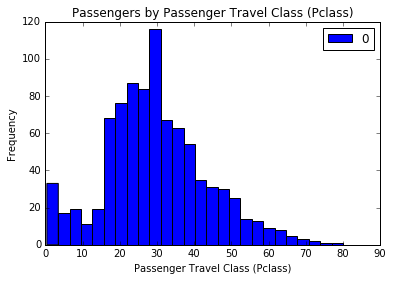

In [20]:
#titanic_df.Age.hist(bins=int(rangeAge))
hist_age_df = pd.DataFrame(np.array(titanic_df.Age))
hist_age_df.plot(kind='hist', bins=int(rangeAge/3), title='Passengers by Passenger Travel Class (Pclass)').set_xlabel("Passenger Travel Class (Pclass)")

The above histogram of Age data shows quite is based on all passenger data.

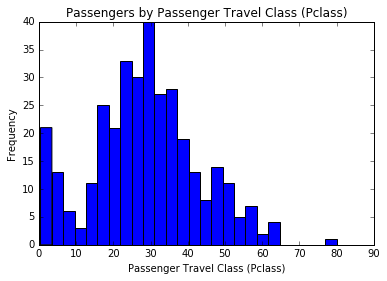

In [21]:
titanic_df[titanic_df.Survived == 1].Age.plot(kind='hist', bins=int(rangeAge/3), title='Passengers by Passenger Travel Class (Pclass)').set_xlabel("Passenger Travel Class (Pclass)")

Above histogram of Age data shows the age distirbution of Survivers.

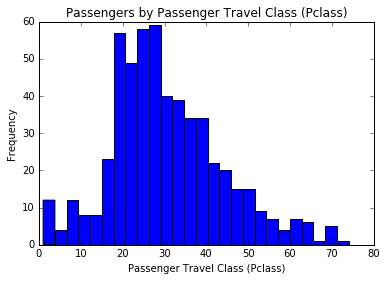

In [22]:
titanic_df[titanic_df.Survived == 0].Age.plot(kind='hist', bins=int(rangeAge/3), title='Passengers by Passenger Travel Class (Pclass)').set_xlabel("Passenger Travel Class (Pclass)")

Above histogram of Age data shows the age distirbution of passengers who did not survive.

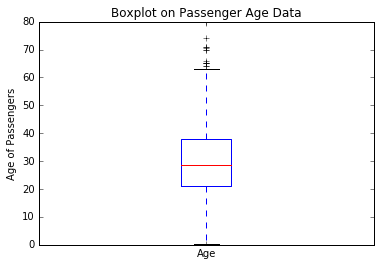

In [23]:
pd.DataFrame(titanic_df.Age).plot(kind='box', return_type='axes', title='Boxplot on Passenger Age Data').set_ylabel("Age of Passengers")

#### PClass - Basic Statistical Information of Pclass (Plassenger Travel Class) data

- Scale of Measurement: Rank scaled
- Type of Variable: Quantitative, disrect

In [24]:
print titanic_df.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


In [25]:
# Mode of Pclass
print 'Mode:   ' + str(titanic_df.Pclass.mode()[0])
print '------------------------------------------------------------'
# Median of Pclass across other columns
print 'Mean of other variables related to Plcass values: '
print '-'
print titanic_df.groupby(['Pclass']).mean()
print '------------------------------------------------------------'
print '-'
print 'Median of other variables related to Plcass values: '
print titanic_df.groupby(['Pclass']).median()

Mode:   3
------------------------------------------------------------
Mean of other variables related to Plcass values: 
-
        Survived       Sex        Age     SibSp     Parch       Fare  Embarked
Pclass                                                                        
1       0.629630  0.435185  37.033395  0.416667  0.356481  84.154687  0.412037
2       0.472826  0.413043  29.713605  0.402174  0.380435  20.662183  0.125000
3       0.242363  0.293279  26.516096  0.615071  0.393075  13.675550  0.427699
------------------------------------------------------------
-
Median of other variables related to Plcass values: 
        Survived  Sex  Age  SibSp  Parch     Fare  Embarked
Pclass                                                     
1              1    0   36      0      0  60.2875         0
2              0    0   29      0      0  14.2500         0
3              0    0   26      0      0   8.0500         0


Taking a look at the data above, we can see some interesting insights:

1) The Passenger Travel Class has a high impact on the propability a passenger survived or not. 1st Class passengers had a propability of about 63 % to survive, 2nd Class passengers about 47 % and 3rd Class passengers about 24 %.

2) Taking a look ath the mean and median of Age data, we see that the age of 1st Class passengers tends to be higher than the ages of 2nd and 3rd Class passengers.

_Note:_ 
- _The Mean is not applicale to binary (Survived, Sex) and ordinal (Pclass, Embarked) scaled data. However, as we chose 0 and 1 as values for binary data, we can easily derive the % a certain values is there. For Survived data, the value multiplied by 100 provides the % of people who serviced in a specific Passenger Class. For Sex data, the value multiplied by 100 provides the % of women in a specific Passenger Class._
- _Please ignore the Median of binary data._


#### Pclass - Visualization of Passenger Travel Class data

Number of Passenger by Passenger Travel Class: Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


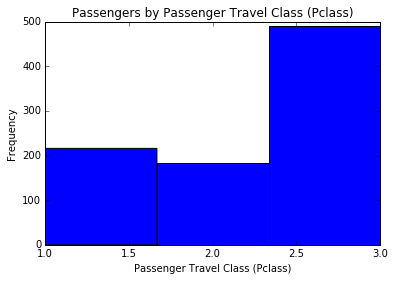

In [26]:
print 'Number of Passenger by Passenger Travel Class: ' + str(titanic_df.groupby('Pclass').Pclass.count())
titanic_df.Pclass.plot(kind='hist', bins=3, title='Passengers by Passenger Travel Class (Pclass)')\
            .set_xlabel("Passenger Travel Class (Pclass)")

Number of Passenger by Passenger Travel Class: Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


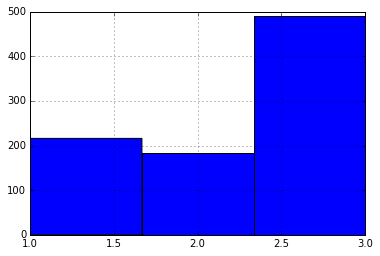

In [27]:
print 'Number of Passenger by Passenger Travel Class: ' + str(titanic_df.groupby('Pclass').Pclass.count())
titanic_df.Pclass.hist(bins=3)

Almost same amout of people had tickets for 1st and 2nd class. In contrast to that, 3rd class was most requent one with about 2,5 times the passangers of each of the other passenger travel classes.

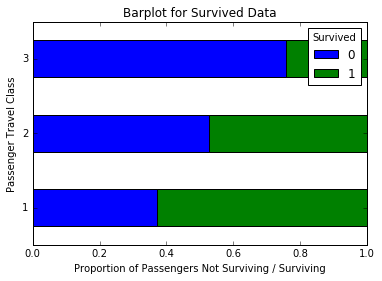

In [29]:
# See how Pclass and Survived data relates
plot_horizontal_bar('Barplot for Survived Data', titanic_df, 'Pclass', 'Survived', 'Passenger Travel Class',\
                        'Proportion of Passengers Not Surviving / Surviving')

#### Sex - Basic Statistical Information of Sex data

- Scale of Measurement: Nominal scaled
- Type of Variable: Qualitative, binary

In [31]:
titanic_df.Sex.describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [32]:
print 'Number of Male passenger in the data set:    ' + str(titanic_df.groupby('Sex')['Sex'].count()[0])
print 'Number of Female passenger in the data set:  ' + str(titanic_df.groupby('Sex')['Sex'].count()[1])

Number of Male passenger in the data set:    577
Number of Female passenger in the data set:  314


In [33]:
# Number of records in the data set
numbRecs = float(len(titanic_df))
print 'Number of total records in the data set:  ' + str(numbRecs)
print '----------------------------------------------------------------------'
numb_male   = titanic_df.Sex.value_counts()[0]
numb_female = titanic_df.Sex.value_counts()[1]
perc_male = 100/numbRecs*numb_male
perc_female = 100/numbRecs*numb_female
print 'Number of male records in the data set:   ' + str(numb_male) + ' (' + str(perc_male) + ' %)'
print 'Number of female records in the data set: ' + str(numb_female) + ' (' + str(perc_female) + ' %)'
print '----------------------------------------------------------------------'
perc_survived_sex = np.array(titanic_df.groupby('Sex')['Survived'].mean())*100
perc_dead_sex =  [100, 100] - perc_survived_sex
print 'Percentage of Male Survivers:          ' + str(perc_survived_sex[0])
print 'Percentage of Male not surviving:      ' + str(perc_dead_sex[0])
print '----------'
print 'Percentage of Female Survivers:        ' + str(perc_survived_sex[1])
print 'Percentage of Female not surviving:    ' + str(perc_dead_sex[1])
print '----------------------------------------------------------------------'
num_male_surv   = perc_survived_sex[0] * numb_male / 100
print 'Number of male surviving:   ' + str(num_male_surv)
num_male_dead   = perc_dead_sex[0] * numb_male/ 100
print 'Number of male dead:        ' + str(num_male_dead)
num_female_surv = perc_survived_sex[1] * numb_female/ 100
print 'Number of female surviving  ' + str(num_female_surv)
num_female_dead = perc_dead_sex[1] * numb_female/ 100
print 'Number of female dead:       ' + str(num_female_dead)
print '----------------------------------------------------------------------'

Number of total records in the data set:  891.0
----------------------------------------------------------------------
Number of male records in the data set:   577 (64.758698092 %)
Number of female records in the data set: 314 (35.241301908 %)
----------------------------------------------------------------------
Percentage of Male Survivers:          18.8908145581
Percentage of Male not surviving:      81.1091854419
----------
Percentage of Female Survivers:        74.2038216561
Percentage of Female not surviving:    25.7961783439
----------------------------------------------------------------------
Number of male surviving:   109.0
Number of male dead:        468.0
Number of female surviving  233.0
Number of female dead:       81.0
----------------------------------------------------------------------


Some more insights to the Sex/Survived data relationship: Counting the gender of passengers, we can see a hugh differenet between male and female. In fact, about 65% of passengers are male and 35% are female. However, taking a look at the % of Survivers of each gender, we can see that more than 81% of male passengers died, whereas the % of females who did is remarkable smaller with about 26%.

#### Sex - Visualization of Sex data

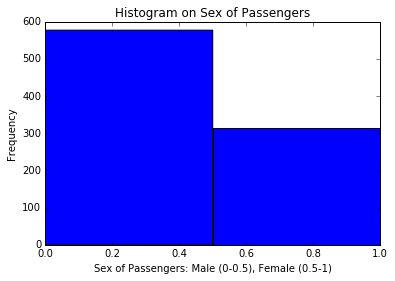

In [34]:
# Distribution of Sex amongst all Passengers
titanic_df.Sex.plot(kind='hist', bins=2, title='Histogram on Sex of Passengers').set_xlabel('Sex of Passengers: Male (0-0.5), Female (0.5-1)')

Illustration above outlines again that there is hugh differenet between the number of male and female passanger on board of the Titanic. 

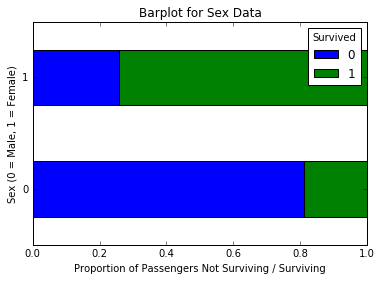

In [35]:
plot_horizontal_bar('Barplot for Sex Data', titanic_df,'Sex','Survived','Sex (0 = Male, 1 = Female)','Proportion of Passengers Not Surviving / Surviving')

Still having in mind that about 2/3 of the passangers are male and 1/3 is female, the above illustration clearly shows that Male passengers were more likly to die than Female passengers. In other words, he probability to survive the tragedy is much more higher for Female than for Male passengers.

#### SibSp - Basic Statistical Information of Siblings/Spouses data

- Scale of Measurement: Interval scaled
- Type of Variable: Quantitative, steady

In [36]:
titanic_df.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [37]:
# Median of SibSp
print 'Median:  ' + str(titanic_df.SibSp.median())
# Mode of SibSp
print 'Mode:    ' + str(titanic_df.SibSp.mode()[0])
# Range of the SibSp Data
rangeSibSp = titanic_df.SibSp.max() - titanic_df.SibSp.min()
print 'Range:   ' + str(rangeSibSp)
# Inter Quantile Range of the SibSp Data
iqrSibSp = titanic_df.SibSp.quantile(.75)- titanic_df.SibSp.quantile(.25)
print 'IQR:     ' + str(iqrSibSp)

Median:  0.0
Mode:    0
Range:   8
IQR:     1.0


A basic statement about the SibSp data related to the passengers is that for the majority of passengers neither siblings nor spouses have been aboard. This is highlighted by the information above like Median, Mode, IQR as well as the 25%/50% quantiles.

#### SibSp - Visualization of Siblings/Spouses data

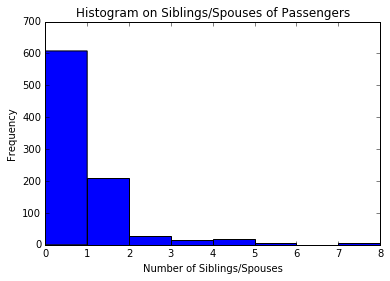

In [38]:
titanic_df.SibSp.plot(kind='hist', bins=rangeSibSp, title='Histogram on Siblings/Spouses of Passengers')\
                .set_xlabel('Number of Siblings/Spouses')

Most of the passengers did not have a Siblings/Spouses on the Titanic (around 600 passengers). About 200 Passengers had 1 Sibling/Spouse onboard. Max number of Sibilings/Spouses was mentioned as 8.

       Survived
SibSp          
0           608
1           209
2            28
3            16
4            18
5             5
8             7


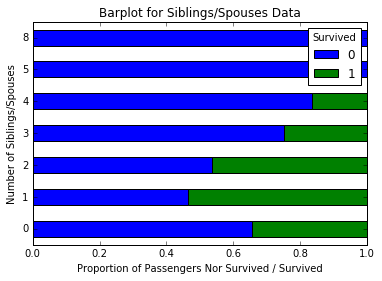

In [39]:
print pd.DataFrame(titanic_df.groupby('SibSp')['Survived'].count())

plot_horizontal_bar('Barplot for Siblings/Spouses Data', titanic_df, 'SibSp', 'Survived', 'Number of Siblings/Spouses',\
                    'Proportion of Passengers Nor Survived / Survived')

What we can see here is that passengers without Siblings and/or Spouses had a probability of about 65% to die. The probability to die for passengers with 1 or 2 Siblings/Spouses is a remarkable lower with about 45% and 50%. Reasons for that are hard to derive with the available data and would only be speculations without a proper foundation.

#### Parch - Basic Statistical Information of Parch data

- Scale of Measurement: Interval scaled
- Type of Variable: Quantitative, steady

In [40]:
print titanic_df.Parch.describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


In [41]:
# Median of Parch
print 'Median:  ' + str(titanic_df.Parch.median())
# Mode of Parch
print 'Mode:    ' + str(titanic_df.Parch.mode()[0])
# Range of the Parch Data
rangeParch = titanic_df.Parch.max() - titanic_df.Parch.min()
print 'Range:   ' + str(rangeParch)
# Inter Quantile Range of the Parch Data
iqrParch = titanic_df.Parch.quantile(.75)- titanic_df.Parch.quantile(.25)
print 'IQR:     ' + str(iqrParch)

Median:  0.0
Mode:    0
Range:   6
IQR:     0.0


A basic statement about the Parch data related to the passengers is that for the majority of passengers neither children nor parents have been aboard. This is highlighted by the information above like Median, Mode, IQR as well as the 25%/50%/75% quantiles.

#### Parch - Visualization of Parch data

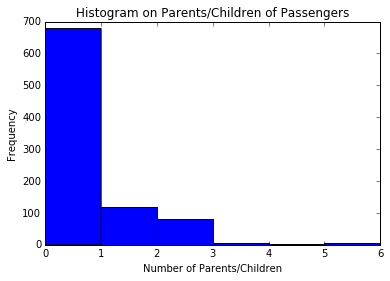

In [42]:
titanic_df.Parch.plot(kind='hist', bins=rangeParch, title='Histogram on Parents/Children of Passengers')\
                .set_xlabel('Number of Parents/Children')

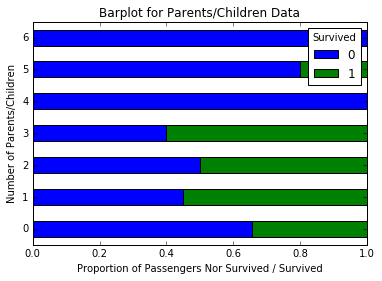

In [43]:
plot_horizontal_bar('Barplot for Parents/Children Data', titanic_df, 'Parch', 'Survived','Number of Parents/Children',\
                    'Proportion of Passengers Nor Survived / Survived')

#### Fare - Basic Statistical Information of Fare data

- Scale of Measurement: NomiIntervalnal Scaled
- Type of Variable: Quantitative, steady

In [44]:
print titanic_df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [45]:
# Median of Fare
print 'Median:   ' + str(titanic_df.Fare.median())
# Mode of Age
print 'Mode:      ' + str(titanic_df.Fare.mode()[0])
# Range of the Fare Data
rangeFare = titanic_df.Fare.max() - titanic_df.Fare.min()
print 'Range:   ' + str(rangeFare)
# Inter Quantile Range of the Fare Data
iqrFare = titanic_df.Fare.quantile(.75)- titanic_df.Fare.quantile(.25)
print 'IQR:      ' + str(iqrFare)
print '-------------------------------------------------'
# Average Fare by Sex 
print  'Avg. Fare of Male:            ' +  str(titanic_df.groupby(['Sex']).mean()['Fare'][0])
print  'Avg. Fare of Female:          ' +  str(titanic_df.groupby(['Sex']).mean()['Fare'][1])
print '-------------------------------------------------'
# Average Fare by PClass
print  'Avg. Fare of PClass 1:        ' +  str(titanic_df.groupby(['Pclass'])['Fare'].mean()[1])
print  'Avg. Fare of PClass 2:        ' +  str(titanic_df.groupby(['Pclass'])['Fare'].mean()[2])
print  'Avg. Fare of PClass 3:        ' +  str(titanic_df.groupby(['Pclass'])['Fare'].mean()[3])
print '-------------------------------------------------'
# Median Fare by Sex
print  'Median of Fare of Male:       ' +  str(titanic_df.groupby(['Sex'])['Fare'].median()[0])
print  'Median of Fare of Female:     ' +  str(titanic_df.groupby(['Sex'])['Fare'].median()[1])
print '-------------------------------------------------'
# Median Fare by PClass
print  'Median of Fare of PClass 1:   ' +  str(titanic_df.groupby(['Pclass'])['Fare'].median()[1])
print  'Median of Fare of PClass 2:   ' +  str(titanic_df.groupby(['Pclass'])['Fare'].median()[2])
print  'Median of Fare of PClass 3:    ' +  str(titanic_df.groupby(['Pclass'])['Fare'].median()[3])

Median:   14.4542
Mode:      8.05
Range:   512.3292
IQR:      23.0896
-------------------------------------------------
Avg. Fare of Male:            25.5238934142
Avg. Fare of Female:          44.4798178344
-------------------------------------------------
Avg. Fare of PClass 1:        84.1546875
Avg. Fare of PClass 2:        20.6621831522
Avg. Fare of PClass 3:        13.6755501018
-------------------------------------------------
Median of Fare of Male:       10.5
Median of Fare of Female:     23.0
-------------------------------------------------
Median of Fare of PClass 1:   60.2875
Median of Fare of PClass 2:   14.25
Median of Fare of PClass 3:    8.05


The mean Fare is at about 32 whereas the median is at about 14,50. The 75% quantil of 31 means that 75% of all Fares are even below the mean. Reason for that are outliers (especially the ones at the very max end) which have a hugh effect on the mean of the data. Median is basically robust to outliers. So taking a look at the median as well as the IQR (Inter Quantile Range) provides us with a good understanding of the Fares of passengers. 

Another interesting investigation is the difference between Fares of Male and Female. Both, mean and medium, show a significantly higher Fare for Female.

#### Fare - Visualization of Fare data

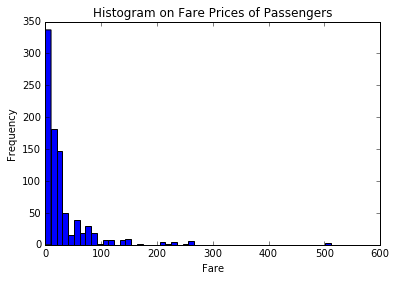

In [46]:
titanic_df.Fare.plot(kind='hist', bins=50, title='Histogram on Fare Prices of Passengers')\
                .set_xlabel('Fare')

What we can see from the above histogram is that values are very much tied to the left side of the histogram where lower prices are located. Basically the histogram is visualizing the finding mentioned below. We can see the majority of the values is below 20, but some extrem outliers to the rights side with values of 100 to 500. 

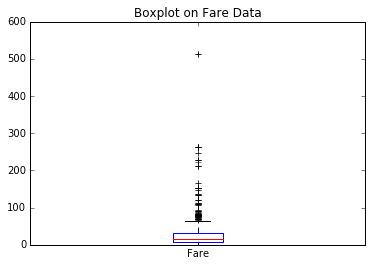

In [47]:
pd.DataFrame(titanic_df.Fare).plot(kind='box', return_type='axes', title='Boxplot on Fare Data')

Above boxplot of Fare data confirms what has been discussed regarding the histogram.

#### Embarked - Basic Statistical Information of Emarked data
- Scale of Measurement: Nominal Scaled
- Type of Variable: Qualitative, polytomous

In [48]:
print titanic_df.Embarked.describe()
# Median of Embarked
print 'Median:  ' + str(titanic_df.Embarked.median())
# Mode of Embarked
print 'Mode:    ' + str(titanic_df.Embarked.mode()[0])

count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64
Median:  0.0
Mode:    0


Above statistical information is not really useful for our investigation. Taking a look at Embarked information individually does not allow us to draw any conclusion.

In [49]:
print titanic_df.groupby('Embarked')['Embarked'].count()

Embarked
0    646
1    168
2     77
Name: Embarked, dtype: int64


Obisously, as mentioned above already, because of the data in Embarked column, it is hard to draw lots of conculsions based on basic statistical information. However, what we are able to figures out is that 0 (which stands for Southampton) is the most frequent port for embarking people.

#### Embarked - Visualization of Embarked data

0: Southampton  - 72.5028058361 %
1: Cherbourg    - 18.8552188552 %
2: Queenstown   - 8.64197530864 %


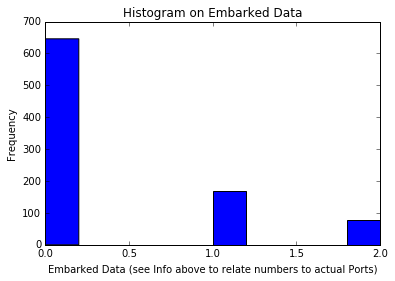

In [50]:
hist_Embarked = titanic_df.Embarked.plot(kind='hist', title='Histogram on Embarked Data')
hist_Embarked.set_xlabel('Embarked Data (see Info above to relate numbers to actual Ports)')

percEmbarkedS = 100/numbRecs*titanic_df.groupby('Embarked')['Embarked'].count()[0]
percEmbarkedC = 100/numbRecs*titanic_df.groupby('Embarked')['Embarked'].count()[1]
percEmbarkedQ = 100/numbRecs*titanic_df.groupby('Embarked')['Embarked'].count()[2]

print '0: Southampton  - ' + str(percEmbarkedS) + ' %'
print '1: Cherbourg    - ' + str(percEmbarkedC) + ' %'
print '2: Queenstown   - ' + str(percEmbarkedQ) + ' %'

Most of the passengers got on the boat in Southampton - 72 %. The rest got onboarded in Cherbourg and Queenstown, whereas Cherbourg emarked even more than twice the amount of Southamption.

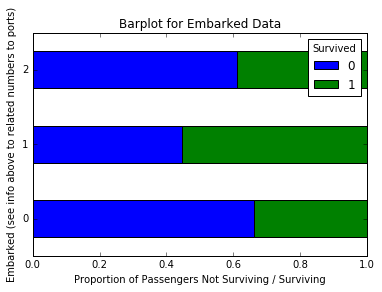

In [51]:
plot_horizontal_bar('Barplot for Embarked Data', titanic_df, 'Embarked', 'Survived', \
                    'Embarked (see info above to related numbers to ports)',\
                    'Proportion of Passengers Not Surviving / Surviving')

### Correlation Analysis on the Data Set

To solve some of the questions stated earlier in the introduction, we will provide some correlation analysis on the data. We use correlation analysis to put two of the data columns in correlation, to see if there exists a dependency between them.

The following questions are going to be answered in that way:

- Is there a relationship between Passenger Travel Class and the probability to survive?
- Is there a relationship between the Fare and the probability to survive?
- Is there a relationship between the Sex and the probability to survive?
- Is there a relationship between the Age and the probability to survive?
- Is there a relationship between the number of Sibilings/Spouses and the probability to survive?
- Is there a relationship between the number of Parents/Children and the probability to survive?

#### Compute Correlation Coefficient for the complete data set

Below some correlation analysis has been applied to the different data sets to see the relationship between certain variables. Important for our analysis is to see how certain variables correlate with __Survived__ variable.

As the method we need to apply to calculated the correlation between 2 variables is dependent on the __scale of measurement__ (interval scaled, rank scaled, nominal scaled) and the __type of the variable__ (quantitative, qualitative), we first need to consider our finding from above investigations to decide which scale of measurement and type a variable is.

#### Relation between Passenger Travel Class and Surviving

Variables under investigation:
- __Survived__: Nominal scaled; qualitative, binary
- __Pclass__: Rank scaled; qualitative, polytomous

Considering the two variables, the following method will be used for correlation analysis: __Cramer V__

In [52]:
# First we gonna do a Chi-Squared Tests
# Pclass to Survivability
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Pclass']], index = 'Survived', columns = ['Pclass'], aggfunc = len)
print 'Pivot table with data we need for chi-squared test:'
print pivot
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print '------------------------------- '
print 'Chi Squared value: '
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print str(chi2)
print 'p-value: '
print str(p_value)
####################################################
# now we can finally calculate Kramers V
print '------------------------------- '
print 'Kramers V coefficient: '
# R values is minimum value of rows/columns of data
R = min(2,3)
# Calculate Cramers V
cramers_v = math.sqrt(chi2/(numbRecs*(R-1)))
print cramers_v

Pivot table with data we need for chi-squared test:
Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
------------------------------- 
Chi Squared value: 
102.888988757
p-value: 
4.5492517113e-23
------------------------------- 
Kramers V coefficient: 
0.339817388005


Acoording to the value of Kramers V coefficient, there existis a medium strong (0.3398) relationship between the Passenger Travel Class and if a passenger survived or not.

#### Relation between Sex and Surviving
Variables under investigation:
- __Survived__: Nominal scaled; qualitative, binary
- __Sex__: Nominal scaled; qualitative, binary

Considering the two variables, the following method will be used for correlation analysis: __Phi Correlation__ 

In [53]:
print 'Phi Correlation Coefficient:     ' + str(phi_correlation(titanic_df, 'Survived', 'Sex'))

Phi Correlation Coefficient:     0.591220954472


With a Phi-Coefficient of almost 0.6 the correlation between the two variables is medium/high. In fact, that means that the gender of a passenger has quite high impact on the passengers probability to survive.

#### Relation between Age and Surviving

Variables under investigation:
- __Survived__: Nominal scaled; qualitative, binary
- __Age__: Interval scaled; quantitative, steady

Considering the two variables, the following method will be used for correlation analysis: __Point Bi-Serial Correlation Coefficient__ 

In [54]:
print 'Point Bi-Serial Correlation Coefficient:'
print stats.pointbiserialr(titanic_df.Survived, titanic_df.Age)[0]

Point Bi-Serial Correlation Coefficient:
-0.0621639612853


Considering the calcualted correlation coefficient (as well as the pvlaue), we note that there is no relationship between the Age of a passenger and him/her surviving the Titanic tragedy.

#### Relation between Siblings/Spouses and Surviving

Variables under investigation:
- __Survived__: Nominal scaled; qualitative, binary
- __SibSp__: Interval scaled; quantitative, steady

Considering the two variables, the following method will be used for correlation analysis: __Point Bi-Serial Correlation Coefficient__ 

In [55]:
print 'Point Bi-Serial Correlation Coefficient:'
print stats.pointbiserialr(titanic_df.Survived, titanic_df.SibSp)[0]

Point Bi-Serial Correlation Coefficient:
-0.0353224988857


Considering the calcualted correlation coefficient (as well as the pvlaue), we note that there is no relationship between the Siblings/Spouses of a passenger and him/her surviving the Titanic tragedy.

#### Relation between Parents/Children and Surviving

Variables under investigation:
- __Survived__: Nominal scaled; qualitative, binary
- __Parch__: Interval scaled; quantitative, steady

Considering the two variables, the following method will be used for correlation analysis: __Point Bi-Serial Correlation Coefficient__ 

In [56]:
print 'Point Bi-Serial Correlation Coefficient:'
print stats.pointbiserialr(titanic_df.Survived, titanic_df.Parch)[0]

Point Bi-Serial Correlation Coefficient:
0.0816294070835


Considering the calcualted correlation coefficient, we note that there is no relationship between the Parents/Children of a passenger and him/her surviving the Titanic tragedy.

#### Relation between Fare and Surviving

Variables under investigation:
- __Survived__: Nominal scaled; qualitative, binary
- __Fare__: Interval scaled; quantitative, steady

Considering the two variables, the following method will be used for correlation analysis: __Point Bi-Serial Correlation Coefficient__ 

In [57]:
print 'Point Bi-Serial Correlation Coefficient:'
print stats.pointbiserialr(titanic_df.Survived, titanic_df.Fare)[0]

Point Bi-Serial Correlation Coefficient:
0.257306522385


With a Phi-Coefficient of almost 0.26 the correlation between the two variables is low/medium. In fact, that means that the Fare of a passenger has low/medium impact on the passengers probability to survive.

#### Relation between Embarked and Surviving

Variables under investigation:
- __Survived__: Nominal scaled; qualitative, binary
- __Embarked__: Nominal scaled; qualitative, polytomous

Considering the two variables, the following method will be used for correlation analysis: __Kramers V Coefficient__ 

In [58]:
titanic_df.groupby('Embarked').count().Survived

Embarked
0    646
1    168
2     77
Name: Survived, dtype: int64

In [59]:
# First we gonna do a Chi-Squared Tests
# Pclass to Survivability
pivot = pd.pivot_table(data = titanic_df[['Survived', 'Embarked']], index = 'Survived', columns = ['Embarked'], aggfunc = len)
print 'Pivot table with data we need for chi-squared test:'
print pivot
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print '------------------------------- '
print 'Chi Squared value: '
chi2, p_value, dof, expected = stats.chi2_contingency(pivot)
print str(chi2)
print 'p-value: '
print str(p_value)

####################################################
# now we can finally calculate Kramers V
print '------------------------------- '
print 'Kramers V coefficient: '
# R values is minimum value of rows/columns of data
R = min(2,3)
# Calculate Cramers V
cramers_v = math.sqrt(chi2/(numbRecs*(R-1)))
print cramers_v

Pivot table with data we need for chi-squared test:
Embarked    0   1   2
Survived             
0         427  75  47
1         219  93  30
------------------------------- 
Chi Squared value: 
25.9644528819
p-value: 
2.30086264814e-06
------------------------------- 
Kramers V coefficient: 
0.170706766392


Acoording to the value of Kramers V coefficient, there existis no/low (0.1707) relationship between the Port where passengers got embarked and if a passenger survived or not.

# Summary of Findings and Insights

There is a number of interesting facts we observed during the above analysis. Some of them, obivously the most important ones, will summaries here again.

- Women were more likely to survive the tragedy than men. That is further illustrated by some of the graphs and descriptive statistics above, as well as it is proofed with a correlation analysis (using  Phi Correlation method) which shows a medium, or even strong relationship (correlation coefficient = 0.59) between _Sex_ and _Survived_ data.
- There seems to be even a quite low relation between the _Embarked_ data and if a passenger was surviving. A correlation coefficient of 0,17 indicates that relationship (Kramers V methods method).
- There exists a medium relationship between the Passengers Travel Class _Pclass_ and if a passenger was surviving. A correlation coefficient of 0,34 indicates that relationship (Kramers V methods).
- There existis a low relation between the ticket price _Fare_ and if a passenger was surviving. A correlation coefficient of 0,26 indicates that relationship (Point Bi-Serial Correlation method).

# Limitations
Obviously there exist limitations related to the above investigation itself as well as to the proposed findings and insights.

- When cleaning the data to make it work for the different statistical methods used throughout the investigation changes have been done to it. Some of the changes did not impact the data quality at all (changing text/characters to numbers without loosing or predicting any information). On the other side, data was not always complete and therefore certain approaches have been taken to deal with that.
- Data has been removed. Name, Ticket and Cabin data has been removed from the investigated data set (reasons why to do that are stated above). When removing the data, potentially we removed the possibility to gain some more insights as well. The name might not have been to interesting for investigation, but even in that piece maybe some information like titles of nobility might have led to some new insights. Also Tickets and Cabin data might have been helpful, but unfortunatley was too cryptic or/and too incomplete for any further investigations.
- Some of the _nan_ values of Age and Embarked data has been filled up. The approach on Age data was to interpolate age data for the missing values using the panda library to apply a linear interpolation. The idea was to provide a better input to the missing data than only picking some specific values like Median, Mode, or Mean to fill up the data (even if it is applied to subgroups). However, certainly a limitation of the investigation. Embarked data was filled up with the Modus/Median of available Embarked data.
- Further it's worth to mention that we got a limited data set. There might be more data helpful for providing more insights to the tragedy. For example the heigth, lenght, weight of a person, or what sports a persons was doing. Many more factors that can impact our analysis.
- Above analysis uses only correlation analysis to come up with some insights and findings. There might be other, even more sophisticated and appropriate methods to analyse the data, eg. Regression Analysis.


# Resources

Resources used to get this project done:

Books:
- Joel Grus: "Data Science from Scratch" - O'Reilley
- Wes McKinney: "Python for Data Analysis" - O'Reilley
- Udo Kuckartz, et al: "Statistik - Eine erständliche Einführung", Springer VS

Websites:
- Google.com
- pandas.pydata.org
- docs.scipy.org
- stackoverflow.com
- and many more...